In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [8]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [8 2 4 7 0 7 1 9 5 3]


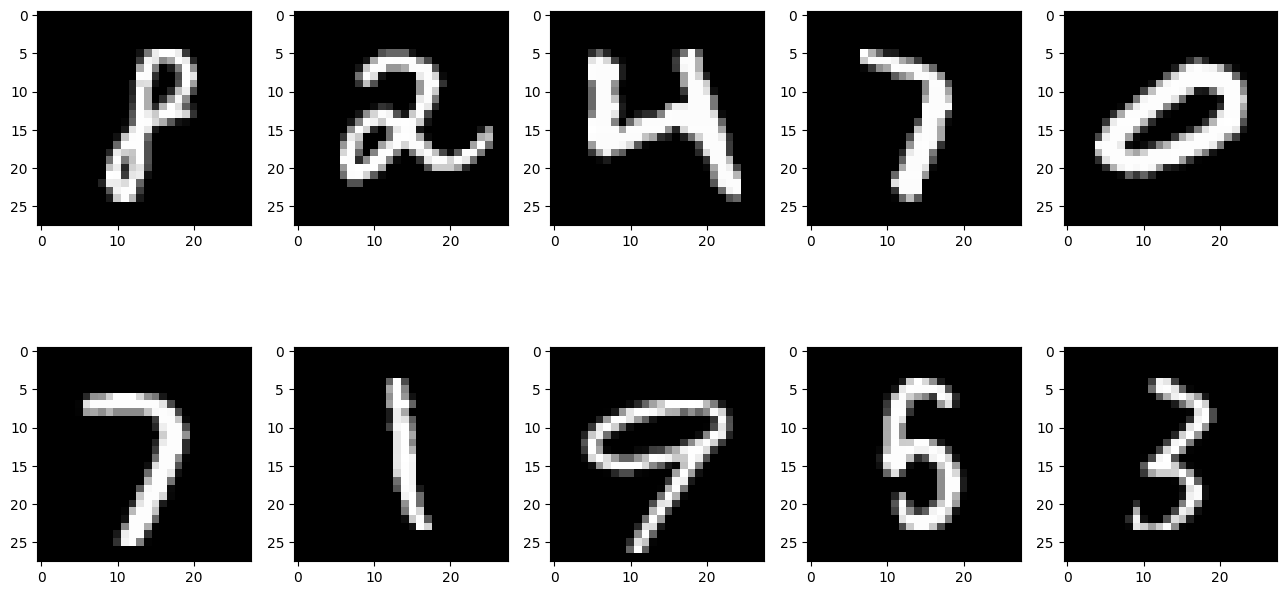

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [10]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [11]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [13]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8570 - loss: 0.4806
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9605 - loss: 0.1293
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9728 - loss: 0.0907
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9752 - loss: 0.0780
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9826 - loss: 0.0575
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9838 - loss: 0.0505
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0445
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9881 - loss: 0.0364
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9892 - loss: 0.0339
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9906 - loss: 0.0274


Plot the loss and accuracy graphs

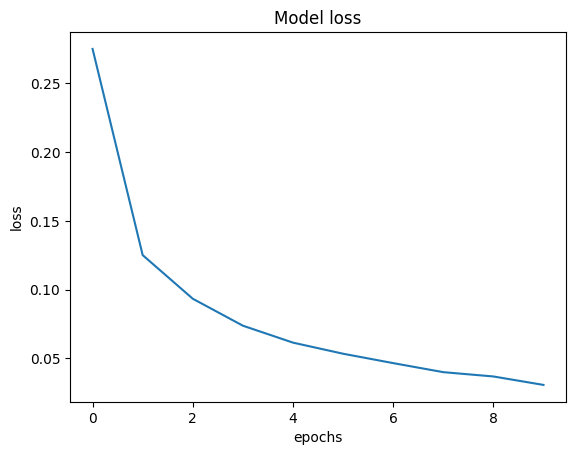

In [14]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

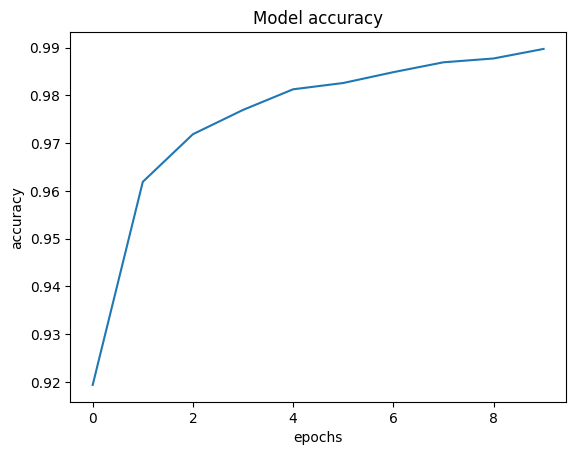

In [15]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [16]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.1049
Loss of the Test dataset is: 0.09220529347658157
Accuracy of the test dataset is: 0.9775000214576721


Save the model weights

In [19]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

In [20]:
train_info = model.fit(new_train_data , new_train_target , epochs = 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9912 - loss: 0.0250
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9917 - loss: 0.0248
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9922 - loss: 0.0235
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9929 - loss: 0.0206
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9929 - loss: 0.0202
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9940 - loss: 0.0187
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9942 - loss: 0.0173
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9945 - loss: 0.0153
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9959 - loss: 0.0118
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9944 - loss: 0.0148
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9965 - loss: 0.0094
Epoch 12/20
1875/1875 ━━━━━━━

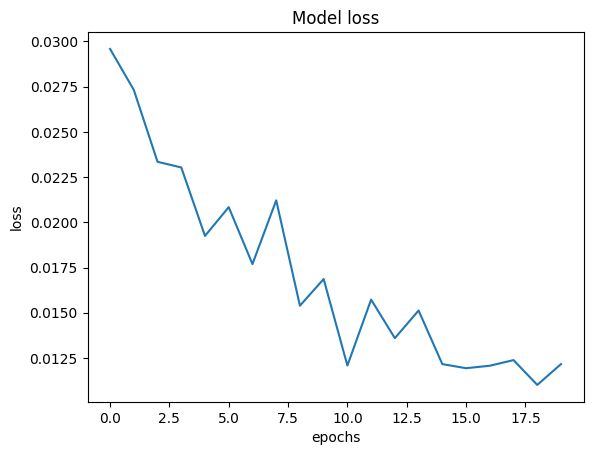

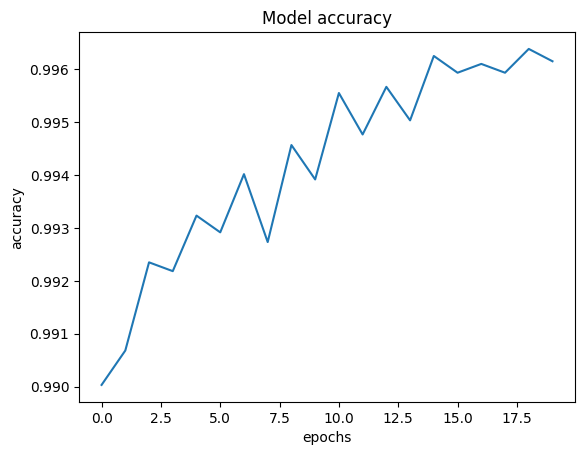

In [21]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8565 - loss: 0.5045
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9670 - loss: 0.1104
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9795 - loss: 0.0692
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9842 - loss: 0.0492
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9891 - loss: 0.0344
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9920 - loss: 0.0266
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9935 - loss: 0.0196
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9950 - loss: 0.0163
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9946 - loss: 0.0165
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9968 - loss: 0.0116
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.1046
Loss of the Test dataset is: 0.09031020849943161
Accuracy of the

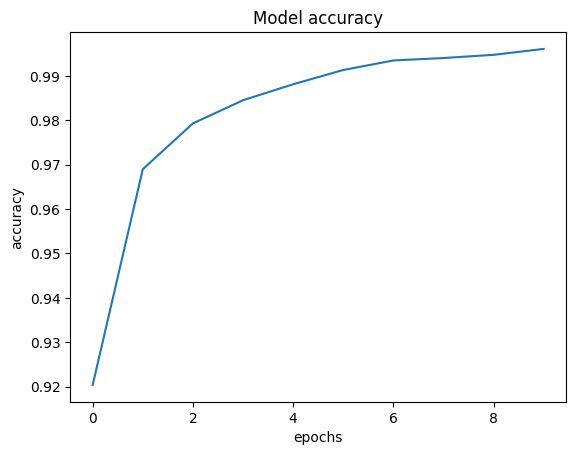

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8536 - loss: 0.9751
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9597 - loss: 0.3550
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9702 - loss: 0.2648
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9754 - loss: 0.2239
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9783 - loss: 0.1996
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9811 - loss: 0.1826
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9814 - loss: 0.1713
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9834 - loss: 0.1595
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9850 - loss: 0.1510
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9845 - loss: 0.1499
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.1717
Loss of the Test dataset with regularization is: 0.15885885059

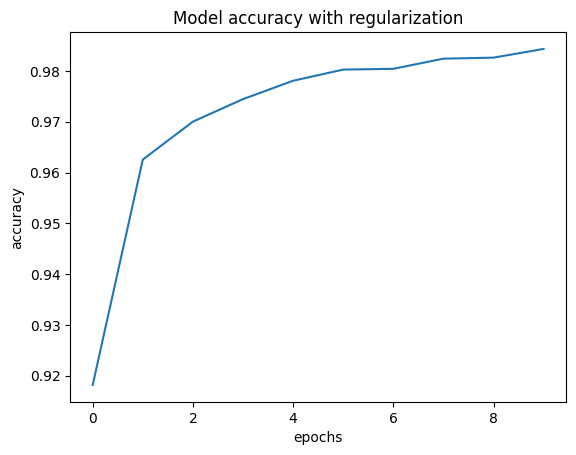

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


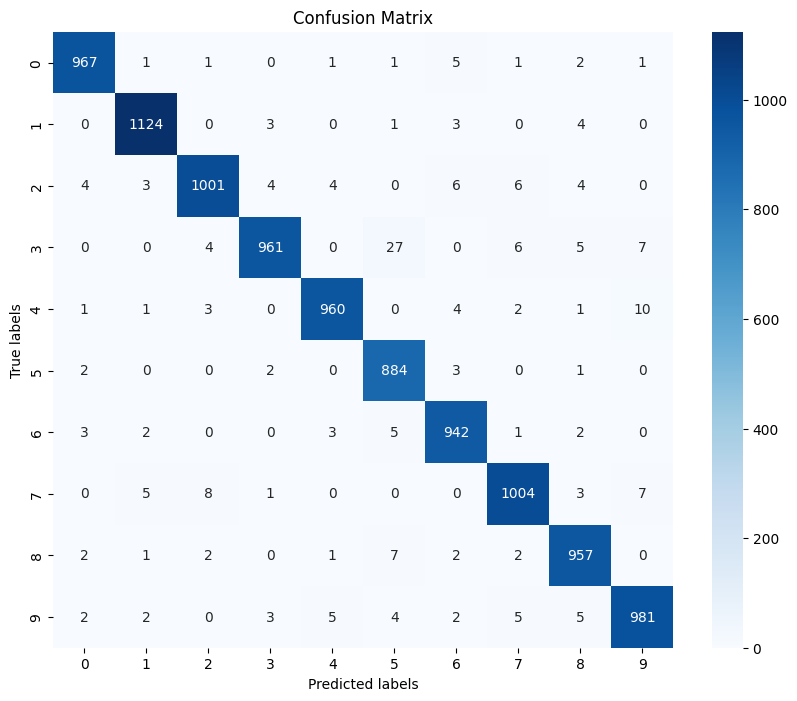

In [22]:
!pip install matplotlib seaborn

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and preprocess the MNIST dataset
(train_data, train_target), (test_data, test_target) = mnist.load_data()

train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

# Flatten the images
train_data = train_data.reshape((-1, 28 * 28))
test_data = test_data.reshape((-1, 28 * 28))

# Convert labels to one-hot encoding
train_target = keras.utils.to_categorical(train_target)
test_target = keras.utils.to_categorical(test_target)

# a. Improve the test accuracy by changing hyperparameters
# Create the model
model = keras.Sequential([
    Flatten(input_shape=(28 * 28,)),
    Dense(256, activation='relu'), # Increased number of neurons
    Dense(128, activation='relu'), # Added another hidden layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', # Changed optimizer to 'adam'
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with adjusted hyperparameters
train_info = model.fit(train_data, train_target, epochs=10, batch_size=128) # Increased batch size

# Evaluate the model on the test data
loss, acc = model.evaluate(test_data, test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

# Plot the training accuracy
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()


# b. Add L1 and L2 regularization terms
from keras.regularizers import l1, l2

# Create a new model with regularization
model_with_regularization = keras.Sequential([
    Flatten(input_shape=(28 * 28,)),
    Dense(256, activation='relu', kernel_regularizer=l1(0.0001)), # Added L1 regularization
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)), # Added L2 regularization
    Dense(10, activation='softmax')
])

# Compile the model
model_with_regularization.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
train_info_reg = model_with_regularization.fit(train_data, train_target, epochs=10, batch_size=128)

# Evaluate the model on the test data
loss_reg, acc_reg = model_with_regularization.evaluate(test_data, test_target)
print(f'Loss of the Test dataset with regularization is: {loss_reg}\nAccuracy of the test dataset with regularization is: {acc_reg}')

# Plot the training accuracy for the model with regularization
plt.plot(train_info_reg.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy with regularization')
plt.show()

# c. Visualize class-wise test dataset performance using a confusion matrix
# Predict the classes for the test data
predictions = model_with_regularization.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_target, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()